(<Figure size 432x288 with 1 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x122ec1350>)

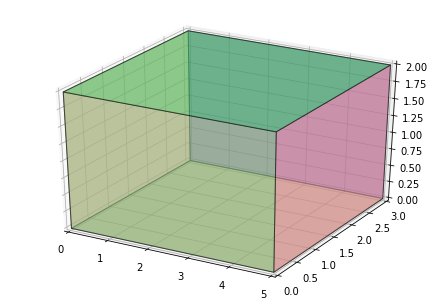

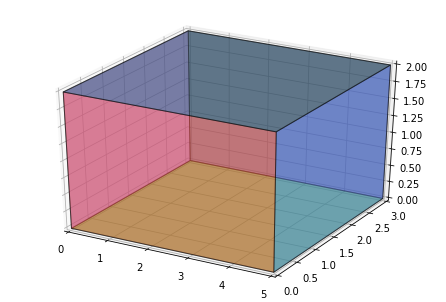

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pyroomacoustics as pra
import pyroomacoustics as room

corners = np.array([[0,0], [0,3], [5,3], [5,0]]).T  # [x,y]
room = pra.Room.from_corners(corners)
room = pra.Room.from_corners(corners)
room.extrude(2.)

fig, ax = room.plot()
ax.set_xlim([0, 5])
ax.set_ylim([0, 3])
ax.set_zlim([0, 2]);
room.plot()


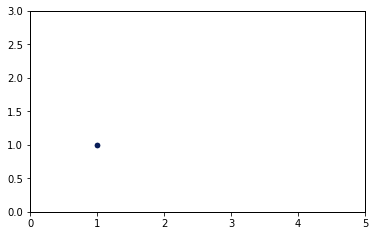

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import fftconvolve
import IPython
import pyroomacoustics as pra

# specify signal source
fs, signal = wavfile.read("Glass Animals - Heat Waves (Official Video).wav")

# add source to 2D room
room = pra.Room.from_corners(corners, fs=fs, ray_tracing=True, air_absorption=True)
room.add_source([1.,1.], signal=signal)

fig, ax = room.plot()

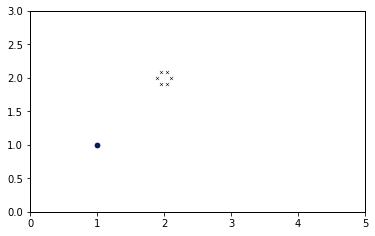

In [30]:
R = pra.circular_2D_array(center=[2.,2.], M=6, phi0=0, radius=0.1)
room.add_microphone_array(pra.MicrophoneArray(R, room.fs))

fig, ax = room.plot()

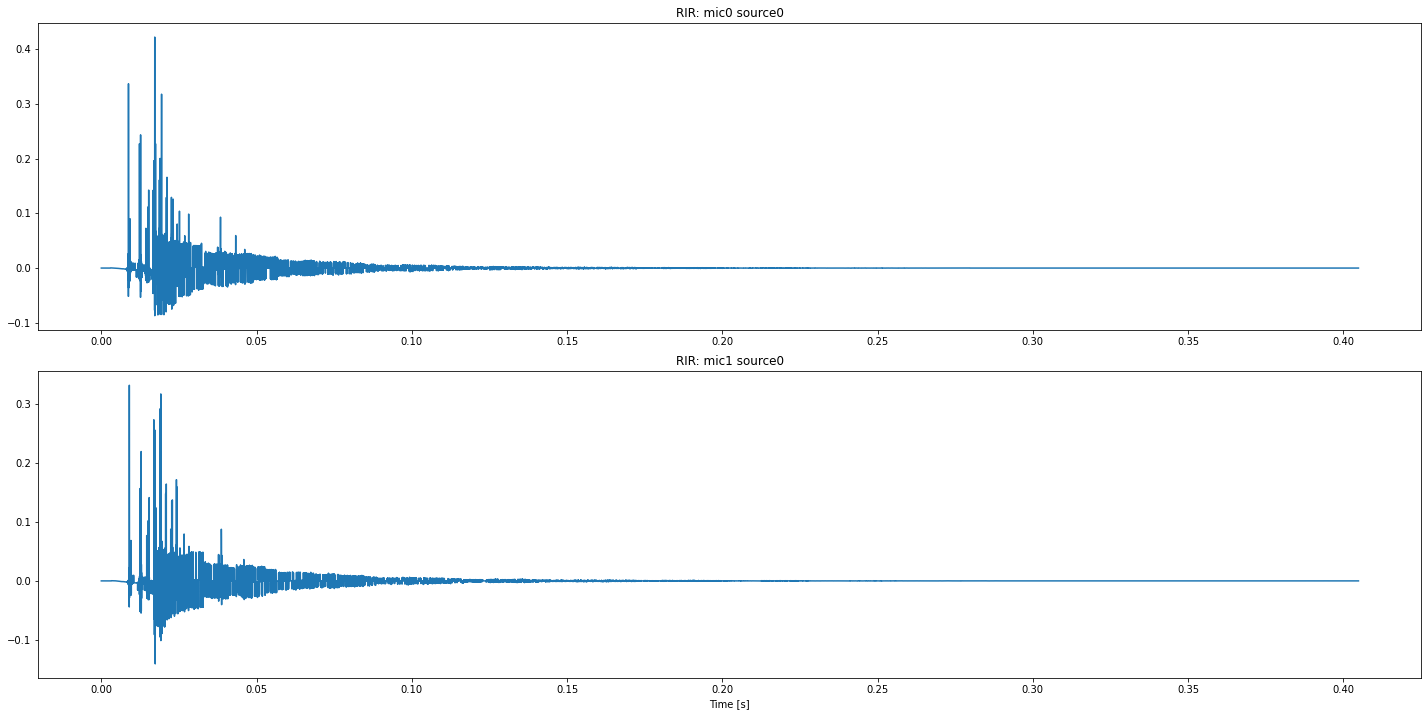

In [22]:
# specify signal source
fs, signal = wavfile.read("Glass Animals - Heat Waves (Official Video).wav")

# set max_order to a low value for a quick (but less accurate) RIR
room = pra.Room.from_corners(corners, fs=fs, max_order=3, materials=pra.Material(0.2, 0.15), ray_tracing=True, air_absorption=True)
room.extrude(2., materials=pra.Material(0.2, 0.15))

# Set the ray tracing parameters
room.set_ray_tracing(receiver_radius=0.5, n_rays=10000, energy_thres=1e-5)

# add source and set the signal to WAV file content
room.add_source([1., 1., 0.5], signal=signal)

# add two-microphone array
R = np.array([[3.5, 3.6], [2., 2.], [0.5,  0.5]])  # [[x], [y], [z]]
room.add_microphone(R)

# compute image sources
room.image_source_model()

# visualize 3D polyhedron room and image sources
fig, ax = room.plot(img_order=3)
fig.set_size_inches(18.5, 10.5)
room.plot_rir()
fig = plt.gcf()
fig.set_size_inches(20, 10)

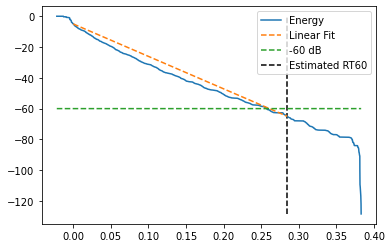

The RT60 is 285 ms


In [23]:
t60 = pra.experimental.measure_rt60(room.rir[0][0], fs=room.fs, plot=True)
print(f"The RT60 is {t60 * 1000:.0f} ms")

In [24]:
# original signal

In [25]:
import pyroomacoustics as pra
m = pra.make_materials(
    ceiling="hard_surface",
    floor="brickwork",
    east="brickwork",
    west="brickwork",
    north="ceiling_metal_panel",
    south="brickwork",
)
# m = pra.Material(energy_absorption="hard_surface")
room = pra.ShoeBox(
    [9, 7.5, 3.5], fs=16000, materials=m, max_order=17, air_absorption=True, ray_tracing=True
)

In [26]:
room.simulate(reference_mic=0, snr=10)

ValueError: There are no sound sources in the room.

In [27]:
room.plot_rir()
fig = plt.gcf()
fig.set_size_inches(20, 10)

AttributeError: 'NoneType' object has no attribute 'M'